In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR

In [2]:
inputfile = 'data/merged/allschools.csv'

In [3]:
df = pd.read_csv(inputfile, dtype={'Median income (dollars)': int})

In [4]:
featurelist = ['none', 'high', 'higher', 'grad',
                'Median income (dollars)', 'Public Yes/No', 'Charter Yes/No']

In [5]:
df['ratio'] = df['Adm'] / df['App']

In [6]:
df['ratio'] = df['ratio'].fillna(0)

In [7]:
X_school = df[featurelist]
y_school = df['ratio']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_school, y_school, random_state=0)
linreg = LinearRegression().fit(X_train, y_train)

print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

# make predictions on the testing set
y_pred = linreg.predict(X_test)
print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

print('linear model intercept: {}'.format(linreg.intercept_))
print('linear model coeff:\n{}'.format(linreg.coef_))

print('Number of non-zero features: {}'.format(np.sum(linreg.coef_ != 0)))

R-squared score (training): 0.057
R-squared score (test): 0.038
RMSE: 0.158
linear model intercept: 0.6210420832849145
linear model coeff:
[ 6.77539978e-01  1.05757224e-01 -3.15016697e-01  2.85914767e-01
  2.92008673e-08  4.28283373e-02  1.14142450e-02]
Number of non-zero features: 7


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_school, y_school, random_state=0)

linridge = Ridge(alpha=20).fit(X_train, y_train)

print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test, y_test)))

# make predictions on the testing set
y_pred = linreg.predict(X_test)
print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

print('ridge regression linear model intercept: {}'.format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'.format(linridge.coef_))

print('Number of non-zero features: {}'.format(np.sum(linridge.coef_ != 0)))

R-squared score (training): 0.036
R-squared score (test): 0.029
RMSE: 0.158
ridge regression linear model intercept: 0.6488630506817017
ridge regression linear model coeff:
[ 1.95043707e-02  2.66598046e-02 -8.32865338e-02  3.01483462e-03
 -1.79497410e-07  3.75840106e-02  1.76178893e-02]
Number of non-zero features: 7


In [10]:
scaler = MinMaxScaler()
X_train, X_test, y_train, y_test = train_test_split(X_school, y_school,
                                                   random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge = Ridge(alpha=20).fit(X_train_scaled, y_train)

print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test_scaled, y_test)))

# make predictions on the testing set
y_pred = linreg.predict(X_test)
print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

print('ridge regression linear model intercept: {}'.format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'.format(linridge.coef_))

print('Number of non-zero features: {}'.format(np.sum(linridge.coef_ != 0)))

R-squared score (training): 0.050
R-squared score (test): 0.038
RMSE: 0.158
ridge regression linear model intercept: 0.6312219931508649
ridge regression linear model coeff:
[ 0.05675496  0.01835492 -0.08302968  0.03013059  0.00314406  0.03671988
  0.01520543]
Number of non-zero features: 7


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_school, y_school, random_state=0)
svr = SVR()
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
svr.fit(X_train_scaled, y_train)
print('R-squared score (training): {:.3f}'
     .format(svr.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(svr.score(X_test_scaled, y_test)))

y_pred = svr.predict(X_test_scaled)
print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

R-squared score (training): 0.091
R-squared score (test): 0.027
RMSE: 0.159


In [13]:
scaler = MinMaxScaler()
X_train, X_test, y_train, y_test = train_test_split(X_school, y_school,
                                                   random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

alphas = []

for a in np.linspace(0, 2, num=100):

    linridge = Ridge(alpha=20).fit(X_train_scaled, y_train)

    alphas.append(linridge.score(X_test_scaled, y_test))

Text(0, 0.5, 'R-squared score')

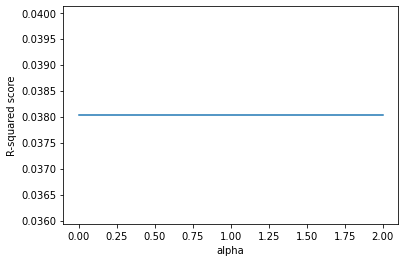

In [14]:
plt.plot(np.linspace(0, 2, num=100), alphas)
plt.xlabel('alpha')
plt.ylabel('R-squared score')